# ¿Cuál es un mejor plan?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

Durante este proyecto se buscará determinar que plan genera más ingresos para la empresa, para ello se preprocesaran los datos, se utilizaran herramientas estadisticas, tales como histogramas, gráficos de caja para visualizar si hay consumos atipicos por parte de los usuarios en llamadas, mensajes y en la navegación con datos.

También se realizarán pruebas de hipótesis para los siguientes supuestos:

* El ingreso promedio para ambos planes es diferente

* el ingreso promedio de los usuarios del área de NY-NJ es diferente a los de las otras regiones

Para ello se realizarán ttest, se buscará el valor de la varianza, que ayudaran a descartar o no las hipótesis anteriormente planteadas.

**Lista de Contenido**

1.1 Inicialización

1.2 Carga de datos

1.3 Preparación de los datos

1.4 Planes

1.5 Corregir los datos

1.6 Enriquecer los datos

1.7 Usuarios

   1.7.1 Correción de datos

   1.7.2 Enriquecer los datos

1.8 Llamadas

   1.8.1 Corrección de datos

   1.8.2 Enriquecer los datos

1.9 Mensajes

   1.9.1 Corrección de datos
   
   1.9.2 Enriquecer los datos

1.10 Internet
    
   1.10.1 Corrección de datos
   
   1.10.2 Enriquecer los datos

1.11 Estudio de las condiciones del plan

1.12 Agragar datos por usuario

1.13 Estudio del comportamiento de los usuarios

   1.13.1 Llamadas
   
   1.13.2 Mensajes
   
   1.13.3 Internet

1.14 Ingreso

1.15 Prueba de hipótesis estadísticas

1.16 Conclusión general

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib as plt
import numpy as np
import statistics as st
from scipy import stats as st

## Cargar los datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls_info = pd.read_csv("/datasets/megaline_calls.csv")
internet_info = pd.read_csv("/datasets/megaline_internet.csv")
message_info = pd.read_csv("/datasets/megaline_messages.csv")
plans_info = pd.read_csv("/datasets/megaline_plans.csv")
users_info = pd.read_csv("/datasets/megaline_users.csv")

## Preparar los datos

## Planes

In [3]:
# Imprime la información general/resumen sobre el DataFrame de los planes
plans_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para los planes
plans_info.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Los datos mostrados están correctos ya que las columnas de mensajes, minutos, megas, el pago mensual, y los costos extras por gigas adicionales son valores enteros, el costo extra por mensajes y minutos son centimos de dolar por lo que son decimales, es decir, float o coma flotante, y por último los nombres de los planes son object.

## Usuarios

In [5]:
# Imprime la información general/resumen sobre el DataFrame de los usuarios
users_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Imprime una muestra de los datos para los usuarios
users_info.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


A primera vista, se puede observar que la columna reg_date está en un formato que no le corresponde y en la coluna churn_date hay valores NaN. A reg_date se le realizará un cambio de formato con to_datetime y en la columna churn_date se rellenarán los NaN con la cadena "ok" ya que esa columna indica es la fecha en que el usuario dejó el plan los que no tienen datos son los que aun permanecen utilizando el plan.

### Corregir datos

In [7]:
#Buscando duplicados
users_info.duplicated().sum()

0

In [8]:
#Trabajando con los NaN
users_info.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [9]:
#En la columna churn_date los usuarios con valores NaN sigifica que para el momento que se tomaron los datos el usuario
#está usando el plan que le corresponde, los mismos no serán reemplazados.
#users_info["churn_date"] = users_info["churn_date"].fillna("ok")
#users_info.info()


In [10]:
users_info["reg_date"] = pd.to_datetime(users_info["reg_date"], format = "%Y-%m-%d")
users_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [11]:
users_info.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


## Llamadas

In [12]:
# Imprime la información/resumen general sobre el DataFrame de las llamadas
calls_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Imprime una muestra de datos para llamadas
calls_info.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


Se puede observar que la columna call_date no se encuentra en el formato datetime, la columna duration hay que redondearla y convertirla a enteros (int) utilizando astype y ceil, call_date se convertirá utilizando to_datetime

### Corregir datos

In [14]:
#Corrigiendo la columna call_date en calls_info
calls_info["call_date"] = pd.to_datetime(calls_info["call_date"], format = "%Y-%m-%d")
calls_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [15]:
#Como las llamadas individuales se redondean al minuto superior se redondearan 
np.ceil(calls_info["duration"]).astype('int')
calls_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [16]:
calls_info

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


### Enriquecer datos

In [17]:
# se agregará la columna month para después calcular las llamadas por mes
calls_info["month"] = calls_info["call_date"].dt.month
calls_info

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11
137731,1499_200,1499,2018-10-20,10.89,10
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,10


## Mensajes

In [18]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
message_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Imprime una muestra de datos para los mensajes
message_info.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [20]:
message_info.duplicated().sum()

0

La columna message_date hay que cambiarle el tipo de dato de object a datetime, utilizando pd.to_datetime

### Corregir datos

In [21]:
message_info["message_date"] = pd.to_datetime(message_info["message_date"], format = "%Y-%m-%d")
message_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer datos

In [22]:
#A este DataFrame hay que agregarle la columna de mes para lueo poder calcular los mensajes por mes
message_info["month"] = message_info["message_date"].dt.month
message_info

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


## Internet

In [23]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
internet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [24]:
# Imprime una muestra de datos para el tráfico de internet
internet_info.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Se puede corregir la columna session_date ya que está contiene fechas y actualmente está como object, hay que cambiarla a datetime utilizando to_datetime

### Corregir datos

In [25]:
#Corrigiendo la columna de session_date
internet_info["session_date"] = pd.to_datetime(internet_info["session_date"], format = "%Y-%m-%d")
internet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer datos

In [26]:
#Se agrega la columna de mes
internet_info["month"] = internet_info["session_date"].dt.month
internet_info

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


## Estudiar las condiciones del plan

In [27]:
# Imprime las condiciones del plan y asegúrate de que te resulten claros
plans_info.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [28]:
plans_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


## Agregar datos por usuario



In [29]:
# Calcula el número de llamadas hechas por cada usuario por mes. Guarda el resultado.
calls_per_month_per_users=calls_info.groupby(["user_id","month"])["duration"].agg({"count", "sum"}).reset_index()
calls_per_month_per_users


,user_id,month,sum,count
0,1000,12,116.83,16
1,1001,8,171.14,27
2,1001,9,297.69,49
3,1001,10,374.11,65
4,1001,11,404.59,64
...,...,...,...,...
2253,1498,12,324.77,39
2254,1499,9,330.37,41
2255,1499,10,363.28,53
2256,1499,11,288.56,45


In [30]:
calls_per_month_per_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  2258 non-null   int64  
 1   month    2258 non-null   int64  
 2   sum      2258 non-null   float64
 3   count    2258 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 70.7 KB


Antes de poseguir aplicaremos un cambio de nombre a los titulos de las columnas en el dataframe filtrado, para que queden más acorde al contenido de la columna

In [31]:
calls_per_month_per_users= calls_per_month_per_users.rename(columns={"count":"calls_per_month",
    "sum":"minutes_per_month"})


In [32]:
calls_per_month_per_users.columns

Index(['user_id', 'month', 'minutes_per_month', 'calls_per_month'], dtype='object')

In [33]:
calls_per_month_per_users

,user_id,month,minutes_per_month,calls_per_month
0,1000,12,116.83,16
1,1001,8,171.14,27
2,1001,9,297.69,49
3,1001,10,374.11,65
4,1001,11,404.59,64
...,...,...,...,...
2253,1498,12,324.77,39
2254,1499,9,330.37,41
2255,1499,10,363.28,53
2256,1499,11,288.56,45


In [34]:
# Calcula el número de mensajes enviados por cada usuario por mes. Guarda el resultado.
sms_per_month_per_users=calls_info.groupby(["user_id","month"])["id"].agg({"count"}).reset_index()
sms_per_month_per_users


,user_id,month,count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [35]:
sms_per_month_per_users= sms_per_month_per_users.rename(columns={"count":"msn_per_month"})
sms_per_month_per_users

,user_id,month,msn_per_month
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [36]:
# Calcula el volumen del trafico de internet usado por cada usuario por mes. Guarda el resultado.
internet_per_month_per_users=internet_info.groupby(["user_id","month"])["mb_used"].agg({"sum"}).reset_index()
internet_per_month_per_users


,user_id,month,sum
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [37]:
#Para poder pasar los megas a gigas hay que dividir los valores de la columna sum entre 1024
internet_per_month_per_users["sum"]=internet_per_month_per_users["sum"]/1024
internet_per_month_per_users

,user_id,month,sum
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754
3,1001,10,21.807119
4,1001,11,18.070605
...,...,...,...
2272,1498,12,22.595400
2273,1499,9,12.680430
2274,1499,10,19.035576
2275,1499,11,16.419756


In [38]:
#Se realiza el redondeno hacía arriba en la sumatoria de gigas mensuales
internet_per_month_per_users["sum"]=internet_per_month_per_users["sum"].apply(np.ceil).astype('int')
internet_per_month_per_users

,user_id,month,sum
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
...,...,...,...
2272,1498,12,23
2273,1499,9,13
2274,1499,10,20
2275,1499,11,17


In [39]:
internet_per_month_per_users= internet_per_month_per_users.rename(columns={"sum":"GB_per_month"})
internet_per_month_per_users

,user_id,month,GB_per_month
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
...,...,...,...
2272,1498,12,23
2273,1499,9,13
2274,1499,10,20
2275,1499,11,17


A continuación se procederá a unificar los diferentes dataframes en uno solo por usuario (user_id) y mes (month), utilizando el método merge 

In [40]:
# Combina los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes
calls_and_sms_merge = calls_per_month_per_users.merge(sms_per_month_per_users, on=["user_id", "month"], how="outer")
calls_and_sms_merge

,user_id,month,minutes_per_month,calls_per_month,msn_per_month
0,1000,12,116.83,16,16
1,1001,8,171.14,27,27
2,1001,9,297.69,49,49
3,1001,10,374.11,65,65
4,1001,11,404.59,64,64
...,...,...,...,...,...
2253,1498,12,324.77,39,39
2254,1499,9,330.37,41,41
2255,1499,10,363.28,53,53
2256,1499,11,288.56,45,45


In [41]:
#Ahora se agregará la informacion de internet
calls_sms_internet= calls_and_sms_merge.merge(internet_per_month_per_users, on=["user_id", "month"], how="outer")
calls_sms_internet

,user_id,month,minutes_per_month,calls_per_month,msn_per_month,GB_per_month
0,1000,12,116.83,16.0,16.0,2.0
1,1001,8,171.14,27.0,27.0,7.0
2,1001,9,297.69,49.0,49.0,14.0
3,1001,10,374.11,65.0,65.0,22.0
4,1001,11,404.59,64.0,64.0,19.0
...,...,...,...,...,...,...
2287,1311,6,NaN,NaN,NaN,2.0
2288,1349,10,NaN,NaN,NaN,13.0
2289,1349,11,NaN,NaN,NaN,17.0
2290,1349,12,NaN,NaN,NaN,13.0


In [42]:
#Añade la información del plan
full_info= calls_sms_internet.merge(users_info,on="user_id", how="left")
full_info

,user_id,month,minutes_per_month,calls_per_month,msn_per_month,GB_per_month,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12,116.83,16.0,16.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,8,171.14,27.0,27.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1001,9,297.69,49.0,49.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
3,1001,10,374.11,65.0,65.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
4,1001,11,404.59,64.0,64.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,1311,6,NaN,NaN,NaN,2.0,Cherlyn,Saunders,69,"Memphis, TN-MS-AR MSA",2018-06-27,ultimate,NaN
2288,1349,10,NaN,NaN,NaN,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN
2289,1349,11,NaN,NaN,NaN,17.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN
2290,1349,12,NaN,NaN,NaN,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN


In [43]:
full_info.columns

Index(['user_id', 'month', 'minutes_per_month', 'calls_per_month',
       'msn_per_month', 'GB_per_month', 'first_name', 'last_name', 'age',
       'city', 'reg_date', 'plan', 'churn_date'],
      dtype='object')

In [44]:
plans_info.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [45]:
#Se realizaran algunos cambios en plan_features, la columna mb_per_month_included será dividida entre 1000 para llevarla a
#gigas y cambiará el nombre de la columna.

plans_info["mb_per_month_included"]=plans_info["mb_per_month_included"]/1024
plans_info

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


In [46]:
plans_info["mb_per_month_included"]=plans_info["mb_per_month_included"].apply(np.floor).astype('int')

In [47]:
plans_info=plans_info.rename(columns={"mb_per_month_included":"gb_per_month_included", "plan_name":"plan"})
plans_info

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


In [48]:
#Las tablas plans_info y full_info se les realizará un merge para juntarlas para poder calcular el ingreso mensual por usuario
full_info_merge=full_info.merge(plans_info, on="plan", how="left")
full_info_merge

,user_id,month,minutes_per_month,calls_per_month,msn_per_month,GB_per_month,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,116.83,16.0,16.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30,3000,70,7,0.01,0.01
1,1001,8,171.14,27.0,27.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15,500,20,10,0.03,0.03
2,1001,9,297.69,49.0,49.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15,500,20,10,0.03,0.03
3,1001,10,374.11,65.0,65.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15,500,20,10,0.03,0.03
4,1001,11,404.59,64.0,64.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,1311,6,NaN,NaN,NaN,2.0,Cherlyn,Saunders,69,"Memphis, TN-MS-AR MSA",2018-06-27,ultimate,NaN,1000,30,3000,70,7,0.01,0.01
2288,1349,10,NaN,NaN,NaN,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN,50,15,500,20,10,0.03,0.03
2289,1349,11,NaN,NaN,NaN,17.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN,50,15,500,20,10,0.03,0.03
2290,1349,12,NaN,NaN,NaN,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN,50,15,500,20,10,0.03,0.03


In [49]:
np.ceil(full_info_merge['minutes_per_month']) 

0       117.0
1       172.0
2       298.0
3       375.0
4       405.0
        ...  
2287      NaN
2288      NaN
2289      NaN
2290      NaN
2291      NaN
Name: minutes_per_month, Length: 2292, dtype: float64

In [50]:
#Imprimiento la información general de la nueva dataframe
full_info_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2292 non-null   int64         
 1   month                  2292 non-null   int64         
 2   minutes_per_month      2258 non-null   float64       
 3   calls_per_month        2258 non-null   float64       
 4   msn_per_month          2258 non-null   float64       
 5   GB_per_month           2277 non-null   float64       
 6   first_name             2292 non-null   object        
 7   last_name              2292 non-null   object        
 8   age                    2292 non-null   int64         
 9   city                   2292 non-null   object        
 10  reg_date               2292 non-null   datetime64[ns]
 11  plan                   2292 non-null   object        
 12  churn_date             158 non-null    object        
 13  mes

In [107]:
#Rellenando los NaN en las columnas minutes_per_month, msn_per_month, GB_per_month, calls_per_month

full_info_merge["calls_per_month"]=full_info_merge["calls_per_month"].fillna(0)
full_info_merge["minutes_per_month"]=full_info_merge["minutes_per_month"].fillna(0)
full_info_merge["msn_per_month"]=full_info_merge["msn_per_month"].fillna(0)
full_info_merge["GB_per_month"]=full_info_merge["GB_per_month"].fillna(0)
full_info_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2292 non-null   int64         
 1   month                  2292 non-null   int64         
 2   minutes_per_month      2292 non-null   float64       
 3   calls_per_month        2292 non-null   float64       
 4   msn_per_month          2292 non-null   float64       
 5   GB_per_month           2292 non-null   float64       
 6   first_name             2292 non-null   object        
 7   last_name              2292 non-null   object        
 8   age                    2292 non-null   int64         
 9   city                   2292 non-null   object        
 10  reg_date               2292 non-null   datetime64[ns]
 11  plan                   2292 non-null   object        
 12  churn_date             2292 non-null   object        
 13  mes

Realizando los cálculos de los minutos, mensajes y gigas extra por mes

In [52]:
full_info_merge["extra_minutes"]=full_info_merge["minutes_per_month"]-full_info_merge["minutes_included"]
        

In [53]:
full_info_merge["extra_msm"]=full_info_merge["msn_per_month"]-full_info_merge["messages_included"]

In [54]:
full_info_merge["extra_gigas"]=full_info_merge["GB_per_month"]-full_info_merge["gb_per_month_included"]

In [55]:
full_info_merge

,user_id,month,minutes_per_month,calls_per_month,msn_per_month,GB_per_month,first_name,last_name,age,city,...,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_minutes,extra_msm,extra_gigas
0,1000,12,116.83,16.0,16.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,1000,30,3000,70,7,0.01,0.01,-2883.17,-984.0,-28.0
1,1001,8,171.14,27.0,27.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15,500,20,10,0.03,0.03,-328.86,-23.0,-8.0
2,1001,9,297.69,49.0,49.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15,500,20,10,0.03,0.03,-202.31,-1.0,-1.0
3,1001,10,374.11,65.0,65.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15,500,20,10,0.03,0.03,-125.89,15.0,7.0
4,1001,11,404.59,64.0,64.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15,500,20,10,0.03,0.03,-95.41,14.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,1311,6,0.00,0.0,0.0,2.0,Cherlyn,Saunders,69,"Memphis, TN-MS-AR MSA",...,1000,30,3000,70,7,0.01,0.01,-3000.00,-1000.0,-28.0
2288,1349,10,0.00,0.0,0.0,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,50,15,500,20,10,0.03,0.03,-500.00,-50.0,-2.0
2289,1349,11,0.00,0.0,0.0,17.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,50,15,500,20,10,0.03,0.03,-500.00,-50.0,2.0
2290,1349,12,0.00,0.0,0.0,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,50,15,500,20,10,0.03,0.03,-500.00,-50.0,-2.0


In [56]:
full_info_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2292 non-null   int64         
 1   month                  2292 non-null   int64         
 2   minutes_per_month      2292 non-null   float64       
 3   calls_per_month        2292 non-null   float64       
 4   msn_per_month          2292 non-null   float64       
 5   GB_per_month           2292 non-null   float64       
 6   first_name             2292 non-null   object        
 7   last_name              2292 non-null   object        
 8   age                    2292 non-null   int64         
 9   city                   2292 non-null   object        
 10  reg_date               2292 non-null   datetime64[ns]
 11  plan                   2292 non-null   object        
 12  churn_date             158 non-null    object        
 13  mes

Los resultados negativos que quedaban en las columnas significa que no consumió el paquete gratis que asigna cada plan, por ello cambiaremos los negativos con el método clip y los rellenaremos con cero.

In [57]:
full_info_merge["extra_minutes"].clip(lower=0, inplace=True)

In [58]:
full_info_merge["extra_msm"].clip(lower=0, inplace=True)

In [59]:
full_info_merge["extra_gigas"].clip(lower=0, inplace=True)

In [60]:
full_info_merge

,user_id,month,minutes_per_month,calls_per_month,msn_per_month,GB_per_month,first_name,last_name,age,city,...,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_minutes,extra_msm,extra_gigas
0,1000,12,116.83,16.0,16.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,1000,30,3000,70,7,0.01,0.01,0.0,0.0,0.0
1,1001,8,171.14,27.0,27.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15,500,20,10,0.03,0.03,0.0,0.0,0.0
2,1001,9,297.69,49.0,49.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15,500,20,10,0.03,0.03,0.0,0.0,0.0
3,1001,10,374.11,65.0,65.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15,500,20,10,0.03,0.03,0.0,15.0,7.0
4,1001,11,404.59,64.0,64.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,50,15,500,20,10,0.03,0.03,0.0,14.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,1311,6,0.00,0.0,0.0,2.0,Cherlyn,Saunders,69,"Memphis, TN-MS-AR MSA",...,1000,30,3000,70,7,0.01,0.01,0.0,0.0,0.0
2288,1349,10,0.00,0.0,0.0,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,50,15,500,20,10,0.03,0.03,0.0,0.0,0.0
2289,1349,11,0.00,0.0,0.0,17.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,50,15,500,20,10,0.03,0.03,0.0,0.0,2.0
2290,1349,12,0.00,0.0,0.0,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,50,15,500,20,10,0.03,0.03,0.0,0.0,0.0


Cálculo de los ingresos totales

In [61]:
full_info_merge["full_payment"]=(full_info_merge["usd_monthly_pay"]+full_info_merge["usd_per_gb"]*full_info_merge["extra_gigas"]+
                                 full_info_merge["usd_per_message"]*full_info_merge["extra_msm"]+full_info_merge["usd_per_minute"]+
                                 full_info_merge["extra_minutes"])

In [62]:
full_info_merge

,user_id,month,minutes_per_month,calls_per_month,msn_per_month,GB_per_month,first_name,last_name,age,city,...,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_minutes,extra_msm,extra_gigas,full_payment
0,1000,12,116.83,16.0,16.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,30,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.01
1,1001,8,171.14,27.0,27.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,15,500,20,10,0.03,0.03,0.0,0.0,0.0,20.03
2,1001,9,297.69,49.0,49.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,15,500,20,10,0.03,0.03,0.0,0.0,0.0,20.03
3,1001,10,374.11,65.0,65.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,15,500,20,10,0.03,0.03,0.0,15.0,7.0,90.48
4,1001,11,404.59,64.0,64.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,15,500,20,10,0.03,0.03,0.0,14.0,4.0,60.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,1311,6,0.00,0.0,0.0,2.0,Cherlyn,Saunders,69,"Memphis, TN-MS-AR MSA",...,30,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.01
2288,1349,10,0.00,0.0,0.0,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,15,500,20,10,0.03,0.03,0.0,0.0,0.0,20.03
2289,1349,11,0.00,0.0,0.0,17.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,15,500,20,10,0.03,0.03,0.0,0.0,2.0,40.03
2290,1349,12,0.00,0.0,0.0,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,15,500,20,10,0.03,0.03,0.0,0.0,0.0,20.03


In [63]:
full_info_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2292 non-null   int64         
 1   month                  2292 non-null   int64         
 2   minutes_per_month      2292 non-null   float64       
 3   calls_per_month        2292 non-null   float64       
 4   msn_per_month          2292 non-null   float64       
 5   GB_per_month           2292 non-null   float64       
 6   first_name             2292 non-null   object        
 7   last_name              2292 non-null   object        
 8   age                    2292 non-null   int64         
 9   city                   2292 non-null   object        
 10  reg_date               2292 non-null   datetime64[ns]
 11  plan                   2292 non-null   object        
 12  churn_date             158 non-null    object        
 13  mes

## Estudia el comportamiento del usuario

### Llamadas

<AxesSubplot:title={'center':'Plan Ultimate: Call Duration time Avg'}, xlabel='month'>

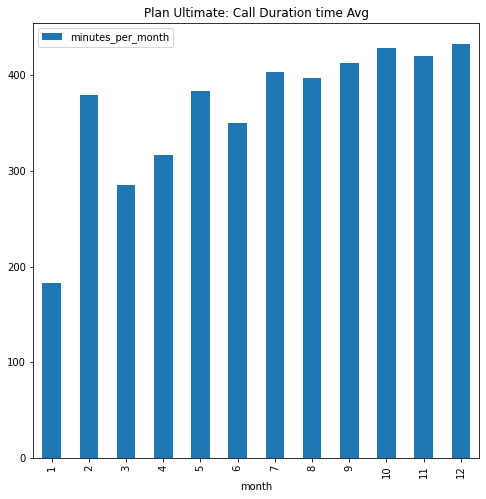

In [64]:
# Compara la duración promedio de llamadas por cada plan por cada mes. Dibuja una gráfica de barras para visualizarlo.
time_calls_ultimate=full_info_merge.query('plan=="ultimate"')
time_call_ultimate_pivot=time_calls_ultimate.pivot_table(index="month", values="minutes_per_month", aggfunc="mean")
time_call_ultimate_pivot.plot(y="minutes_per_month", kind="bar", title="Plan Ultimate: Call Duration time Avg", figsize=(8,8))


<AxesSubplot:title={'center':'Plan Surf: Call Duration time Avg'}, xlabel='month'>

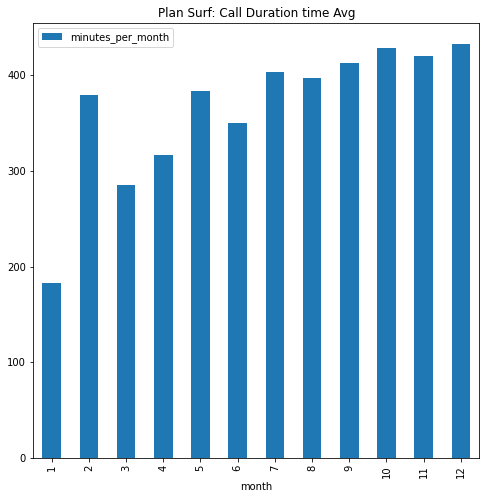

In [65]:
time_calls_surf=full_info_merge.query('plan=="surf"')
time_call_surf_pivot=time_calls_ultimate.pivot_table(index="month", values="minutes_per_month", aggfunc="mean")
time_call_surf_pivot.plot(y="minutes_per_month", kind="bar", title="Plan Surf: Call Duration time Avg", figsize=(8,8))

Observando las gráficas de barras para ambos planes, los usuarios tienen un comportamiento similar en el consumo de minutos mensuales de sus planes.

array([[<AxesSubplot:title={'center':'minutes_per_month'}>]], dtype=object)

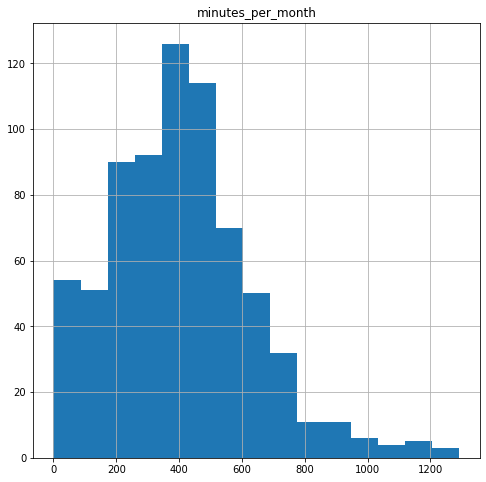

In [66]:
# Compara el número de minutos que los usuarios de cada plan requieren cada mes. Traza un histograma.
time_calls_ultimate.hist("minutes_per_month", bins=15, figsize=(8,8))

En el histograma del plan Ultimate, los usuarios gastan al rededor de 190 a 500 minutos por mes, teniendo un pico hacia los 400 minutos. Después de los 800 minutos se marca un descenso importante.

array([[<AxesSubplot:title={'center':'minutes_per_month'}>]], dtype=object)

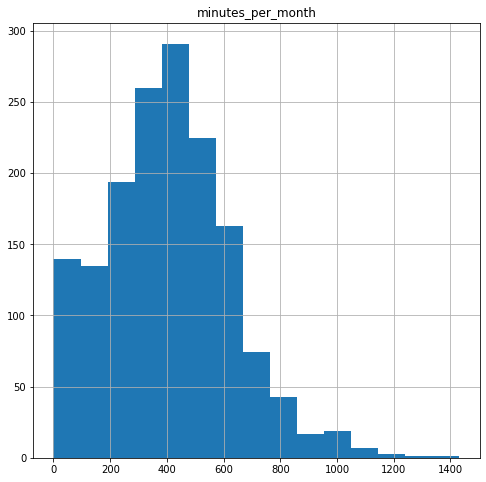

In [67]:
time_calls_surf.hist("minutes_per_month", bins=15, figsize=(8,8))

En este histograma se puede observar que el mayor consumo se encuentra entre los 200 y los 580 minutos, teniendo su máximo en los 500 minutos, por arriba de los 800 minutos se pudieran considerar como valores atipicos.

In [68]:
# Calcula la media y la varianza de la duración mensual de llamadas.
time_calls_ultimate["minutes_per_month"].describe()

count     719.000000
mean      406.758025
std       226.898171
min         0.000000
25%       246.680000
50%       398.600000
75%       532.665000
max      1292.090000
Name: minutes_per_month, dtype: float64

In [69]:
#Calculo de la varianza para el plan Ultimate
np.var(time_calls_ultimate["minutes_per_month"])

51411.17683142635

In [70]:

time_calls_surf["minutes_per_month"].describe()

count    1573.000000
mean      404.762390
std       221.664397
min         0.000000
25%       255.470000
50%       401.760000
75%       543.680000
max      1431.220000
Name: minutes_per_month, dtype: float64

In [71]:
#Caluculando la varianza para el plan Surf
np.var(time_calls_surf["minutes_per_month"])

49103.8683332564

<AxesSubplot:>

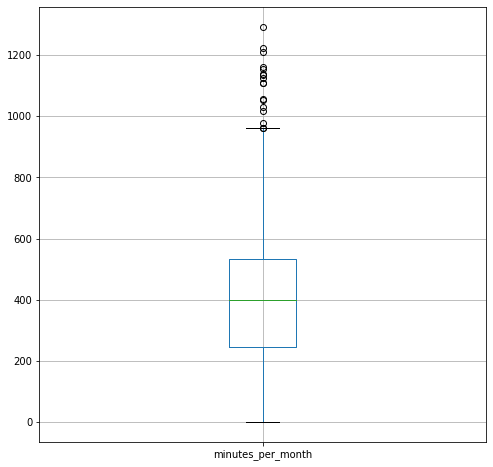

In [72]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.
time_calls_ultimate.boxplot("minutes_per_month", figsize=(8,8))

<AxesSubplot:>

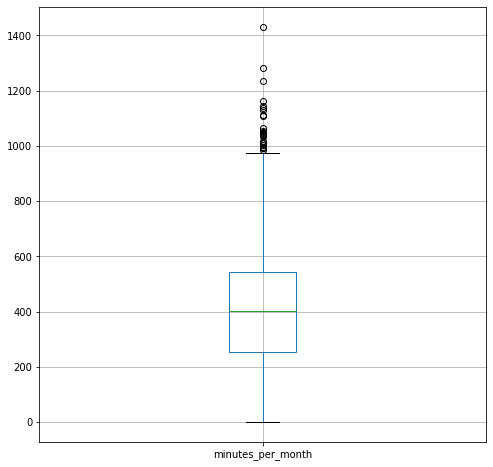

In [73]:
time_calls_surf.boxplot("minutes_per_month", figsize=(8,8))

A simple inspección los diagramas de caja para los minutos por mes de cada plan, ambos tienen valores atipicos por arriba de los 1000 minutos. La media es muy próxima para ambos, 406 para el plan ultimate y 404 para el plan surf. El comportamento para ambos planes es muy parecido.

### Mensajes

<AxesSubplot:title={'center':'Plan Ultimate: MSM Sent Avg'}, xlabel='month'>

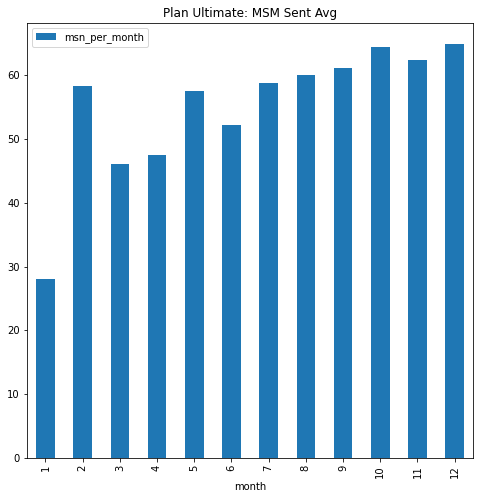

In [74]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
msm_ultimate=full_info_merge.query('plan=="ultimate"')

msm_ultimate_pivot=msm_ultimate.pivot_table(index="month", values="msn_per_month", aggfunc="mean")
msm_ultimate_pivot.plot(y="msn_per_month", kind="bar", title="Plan Ultimate: MSM Sent Avg", figsize=(8,8))

<AxesSubplot:title={'center':'Plan Surf: MSM Sent Avg'}, xlabel='month'>

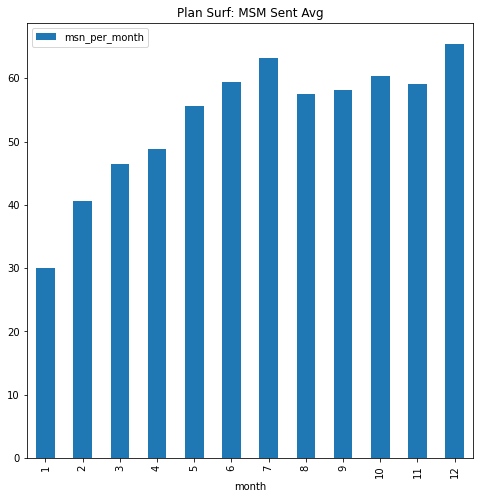

In [75]:
msm_surf=full_info_merge.query('plan=="surf"')

msm_surf_pivot=msm_surf.pivot_table(index="month", values="msn_per_month", aggfunc="mean")
msm_surf_pivot.plot(y="msn_per_month", kind="bar", title="Plan Surf: MSM Sent Avg", figsize=(8,8))

array([[<AxesSubplot:title={'center':'msn_per_month'}>]], dtype=object)

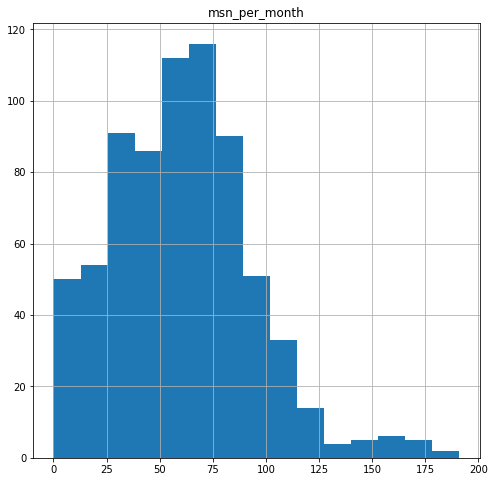

In [76]:

# Compara el número de mensajes que los usuarios de cada plan requieren cada mes. Traza un histograma.
msm_ultimate.hist("msn_per_month", bins=15, figsize=(8,8))


In [77]:
msm_ultimate["msn_per_month"].describe()

count    719.000000
mean      60.710709
std       33.188997
min        0.000000
25%       36.000000
50%       61.000000
75%       80.000000
max      191.000000
Name: msn_per_month, dtype: float64

In [78]:
np.var(msm_ultimate["msn_per_month"])

1099.9775070072983

array([[<AxesSubplot:title={'center':'msn_per_month'}>]], dtype=object)

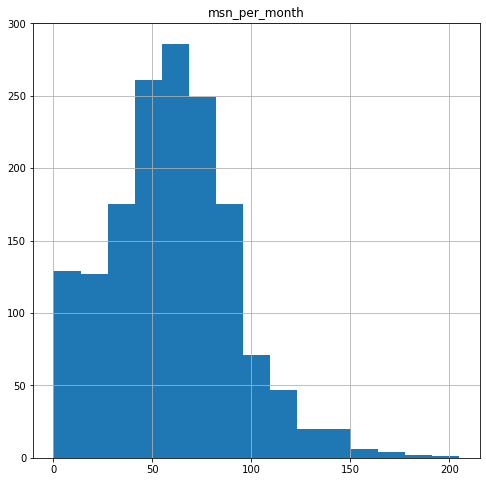

In [79]:
# Compara el número de mensajes que los usuarios de cada plan requieren cada mes. Traza un histograma.
msm_surf.hist("msn_per_month", bins=15, figsize=(8,8))

La comparación de los histogramas para el consumo de mensajes mensuales indica un uso parael plan ultimate de 25 a 90 mensajes por mes y para el plan surf de 30 a 95 mensajes por mes, lo que muestra es que tienen un comportamiento muy similar.

In [80]:
# Calcula la media y la varianza del consumo mensual de mensajes.
msm_surf["msn_per_month"].describe()

count    1573.000000
mean       59.811825
std        32.017989
min         0.000000
25%        39.000000
50%        60.000000
75%        79.000000
max       205.000000
Name: msn_per_month, dtype: float64

In [81]:
np.var(msm_surf["msn_per_month"])

1024.4998728948333

<AxesSubplot:>

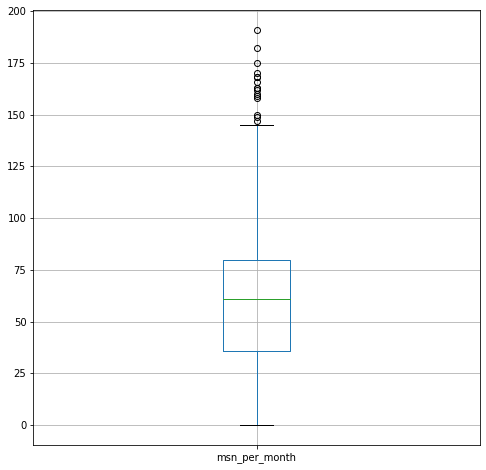

In [82]:
msm_ultimate.boxplot("msn_per_month", figsize=(8,8))

<AxesSubplot:>

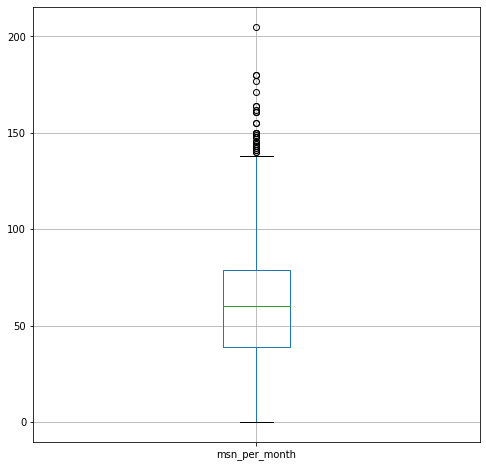

In [83]:
msm_surf.boxplot("msn_per_month", figsize=(8,8))

El promedio mensual de consumo para ambos planes es muy similar, 60 para el plan ultimate y 59 para el plan surf, los valoreas atipicos para el plan ultimate están por arriba de los 145 mensajes y para el plan surf los valores atipicos están por arriba de los 140 mensajes.

### Internet

<AxesSubplot:title={'center':'Plan Ultimate: GB Consumed Avg'}, xlabel='month'>

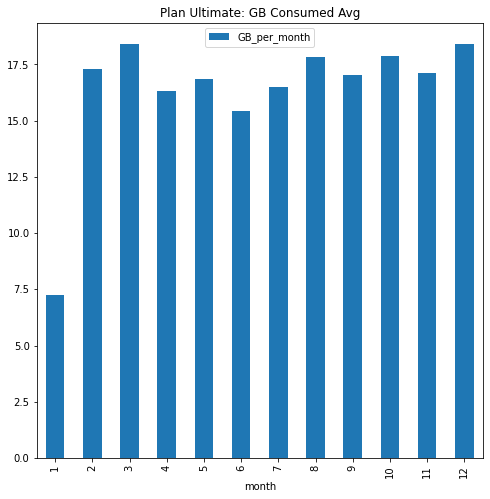

In [84]:
# Compara la cantidad de tráfico de internet consumido por usuarios por plan
internet_ultimate=full_info_merge.query('plan=="ultimate"')

internet_ultimate_pivot=msm_ultimate.pivot_table(index="month", values="GB_per_month", aggfunc="mean")
internet_ultimate_pivot.plot(y="GB_per_month", kind="bar", title="Plan Ultimate: GB Consumed Avg", figsize=(8,8))

<AxesSubplot:title={'center':'Plan Ultimate: GB Consumed Avg'}, xlabel='month'>

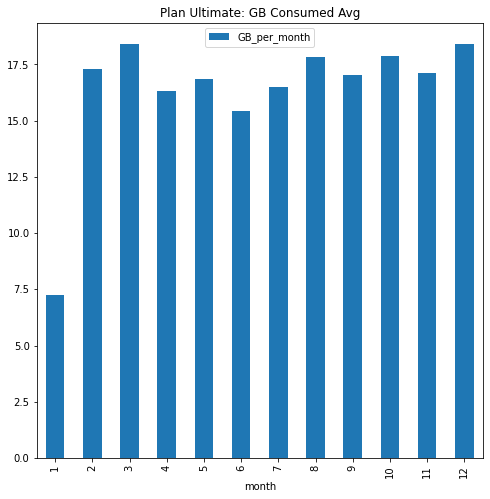

In [85]:
internet_surf=full_info_merge.query('plan=="surf"')

internet_surf_pivot=msm_ultimate.pivot_table(index="month", values="GB_per_month", aggfunc="mean")
internet_surf_pivot.plot(y="GB_per_month", kind="bar", title="Plan Ultimate: GB Consumed Avg", figsize=(8,8))

array([[<AxesSubplot:title={'center':'GB_per_month'}>]], dtype=object)

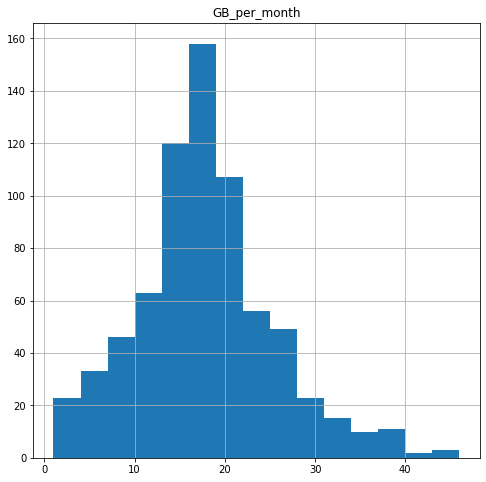

In [86]:
internet_ultimate.hist("GB_per_month", bins=15, figsize=(8,8))

array([[<AxesSubplot:title={'center':'GB_per_month'}>]], dtype=object)

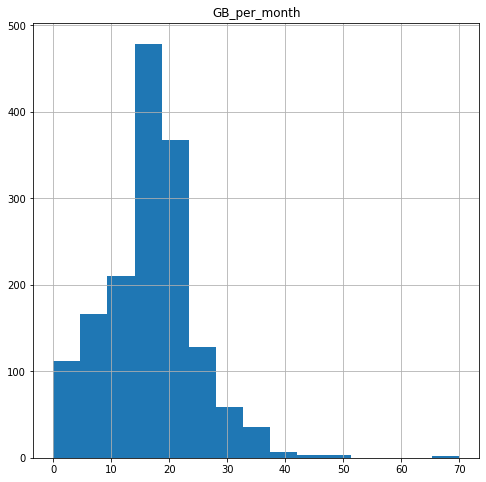

In [87]:
internet_surf.hist("GB_per_month", bins=15, figsize=(8,8))

En ambos planes se nota un consumo de datos que va desde los 10 GB hasta los 25 GB, mostrando un descenso en los mismos a partir de esta última cifra, el pico de consumo se observa hacía los 15 Gb.

## Ingreso

In [88]:
#Revisanto las columnas creadas de costos se observan que son tipo object, previamente para poder realizar los 
#cálculos habrá que cambiar el tipo de dato comtenido en estas columnas (extra_cost_calls, extra_cost_msm y extra_cost_gigas)
full_info_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2292 non-null   int64         
 1   month                  2292 non-null   int64         
 2   minutes_per_month      2292 non-null   float64       
 3   calls_per_month        2292 non-null   float64       
 4   msn_per_month          2292 non-null   float64       
 5   GB_per_month           2292 non-null   float64       
 6   first_name             2292 non-null   object        
 7   last_name              2292 non-null   object        
 8   age                    2292 non-null   int64         
 9   city                   2292 non-null   object        
 10  reg_date               2292 non-null   datetime64[ns]
 11  plan                   2292 non-null   object        
 12  churn_date             158 non-null    object        
 13  mes

In [89]:
full_info_merge.fillna(0, inplace=True)

In [90]:
full_info_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2292 non-null   int64         
 1   month                  2292 non-null   int64         
 2   minutes_per_month      2292 non-null   float64       
 3   calls_per_month        2292 non-null   float64       
 4   msn_per_month          2292 non-null   float64       
 5   GB_per_month           2292 non-null   float64       
 6   first_name             2292 non-null   object        
 7   last_name              2292 non-null   object        
 8   age                    2292 non-null   int64         
 9   city                   2292 non-null   object        
 10  reg_date               2292 non-null   datetime64[ns]
 11  plan                   2292 non-null   object        
 12  churn_date             2292 non-null   object        
 13  mes

In [91]:
full_info_merge.isna().sum()

user_id                  0
month                    0
minutes_per_month        0
calls_per_month          0
msn_per_month            0
GB_per_month             0
first_name               0
last_name                0
age                      0
city                     0
reg_date                 0
plan                     0
churn_date               0
messages_included        0
gb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
extra_minutes            0
extra_msm                0
extra_gigas              0
full_payment             0
dtype: int64

In [92]:
full_info_merge

,user_id,month,minutes_per_month,calls_per_month,msn_per_month,GB_per_month,first_name,last_name,age,city,...,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_minutes,extra_msm,extra_gigas,full_payment
0,1000,12,116.83,16.0,16.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,30,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.01
1,1001,8,171.14,27.0,27.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,15,500,20,10,0.03,0.03,0.0,0.0,0.0,20.03
2,1001,9,297.69,49.0,49.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,15,500,20,10,0.03,0.03,0.0,0.0,0.0,20.03
3,1001,10,374.11,65.0,65.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,15,500,20,10,0.03,0.03,0.0,15.0,7.0,90.48
4,1001,11,404.59,64.0,64.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,15,500,20,10,0.03,0.03,0.0,14.0,4.0,60.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,1311,6,0.00,0.0,0.0,2.0,Cherlyn,Saunders,69,"Memphis, TN-MS-AR MSA",...,30,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.01
2288,1349,10,0.00,0.0,0.0,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,15,500,20,10,0.03,0.03,0.0,0.0,0.0,20.03
2289,1349,11,0.00,0.0,0.0,17.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,15,500,20,10,0.03,0.03,0.0,0.0,2.0,40.03
2290,1349,12,0.00,0.0,0.0,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",...,15,500,20,10,0.03,0.03,0.0,0.0,0.0,20.03


<AxesSubplot:title={'center':'Extra Pay Plan Comparison'}, xlabel='plan'>

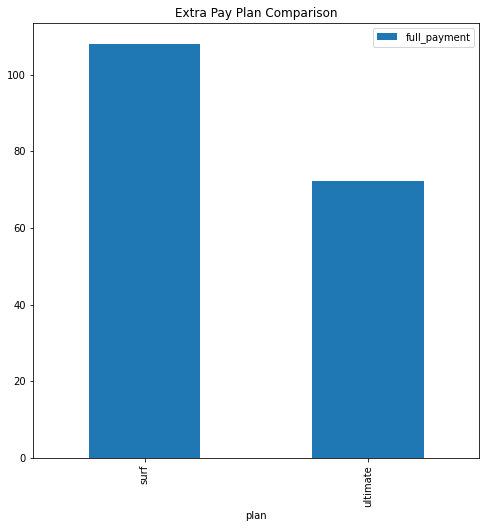

In [93]:
extra_pay_comp_pivot= full_info_merge.pivot_table(index="plan", values="full_payment", aggfunc="mean")
extra_pay_comp_pivot.plot(title="Extra Pay Plan Comparison", figsize=(8,8), kind="bar")

En el gráfico de barras, de forma general se puede observar que el plan surf tiene un ingreso promedio superior al ingreso que el plan ultimate. El plan ultimate se encuentra aproximadamente en usd70, mientras el plan surf se encuentra aproximadamnete en usd110.

## Probar las hipótesis estadísticas.

Se plantearan dos hipotesis, la hipotesis nula (H0) será: los ingresos promedios para ambos planes son iguales, la hipotesis alternativa (H1)será que los ingresos promedios para ambos planes son diferentes. A continuación realizaremos la prueba de hipotesis utilizando el método scipy.stats.ttest_ind(array1, array2, equal_var). Se tomara el valor de significancia como 0.05

In [94]:
#Cálculo de varianza para el plan ultimate
total_ultimate=full_info_merge.query('plan=="ultimate"')
np.var(total_ultimate["full_payment"])

129.84102862691768

In [95]:
#Cálculo de varianza para el plan surf
total_surf=full_info_merge.query('plan=="surf"')
np.var(total_surf["full_payment"])

17439.5115960694

In [96]:
# Prueba las hipótesis
alpha=0.05

results = st.ttest_ind(total_ultimate['full_payment'], total_surf['full_payment'], equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    if results.pvalue < alpha:
        print("Rechazamos la hipótesis nula")
    else:
        print("No rechazamos la hipótesis nula")

p-value: 1.3577148883918325e-25
Rechazamos la hipótesis nula


Ahora probaremos la hipótesis nula (H0) de que el ingreso promedio de los usuarios del área de NY-NJ es igual a los de las otras regiones. La hipótesis alternativa (H1) es que los ingresos de los usuarios de NY-NJ es diferente a la de las otras regiones

In [97]:
full_info_merge["city"].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [98]:
#Para separar las regiones habrá que realizar una función que recorra la columan city y extraiga NY-NJ
def region_ny_nj(city):
    cities = city.split(",")
    for entry in cities:
        if ('NY-NJ' in entry)|(entry == 'NY')|(entry == 'NJ'):
            return 'ny-nj'

In [99]:
#Hay que crear una columna nueva para las regiones 

full_info_merge['region'] = full_info_merge['city'].apply(region_ny_nj)
#Para las filas que no cumplen la condición los NaN se rellenaran con "other"
full_info_merge['region'] = full_info_merge['region'].fillna('other')

In [100]:
#Aplicando un value_count() sobre la columna region
full_info_merge["region"].value_counts()

other    1916
ny-nj     376
Name: region, dtype: int64

Como se tienen dos poblaciones se aplicará el test **st.ttest_ind**, se tomará como alpha un valor de 0.05, comprobaremos que para los dos grupos las varianzas son diferentes

In [101]:
ny_nj_region= full_info_merge.query('region == "ny-nj"')

In [102]:
np.var(ny_nj_region["full_payment"])

9417.922343331255

In [103]:
other_region= full_info_merge.query('region == "other"')

In [104]:
np.var(other_region["full_payment"])

12844.106596166199

In [105]:
full_info_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2292 non-null   int64         
 1   month                  2292 non-null   int64         
 2   minutes_per_month      2292 non-null   float64       
 3   calls_per_month        2292 non-null   float64       
 4   msn_per_month          2292 non-null   float64       
 5   GB_per_month           2292 non-null   float64       
 6   first_name             2292 non-null   object        
 7   last_name              2292 non-null   object        
 8   age                    2292 non-null   int64         
 9   city                   2292 non-null   object        
 10  reg_date               2292 non-null   datetime64[ns]
 11  plan                   2292 non-null   object        
 12  churn_date             2292 non-null   object        
 13  mes

In [106]:
# Prueba las hipótesis
alpha = 0.05

results =st.ttest_ind(ny_nj_region["full_payment"], other_region["full_payment"], equal_var=False)
print('p-value:',results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.48807762522656384
No rechazamos la hipótesis nula


## Conclusión general



* A travé de diferentes analisis, se pudo determinar que el comportamiento de los usuarios de los planes surf y ultimate es similar en el consumo de datos, minutos de llamadas y envío de mensajes.

* Comparando los ingresos promedios, el plan ultimate se encuentra aproximadamente en usd70, mientras el plan surf se encuentra aproximadamnete en usd110, así que se debe invertir más en la campaña publicitaria para el plan surf ya que genera mejores ingresos.

* En la primera prueba de hipótesis se pudo rechazar la hipótesis nula de que los ingresos promedios para ambos planes son iguales. 

* En la segunda prueba de hipotesis referente a si el consumo de los clientes de la región NY-NJ es igual a la de otras regiones la hipótesis nula no pudo ser rechazada.
